Importing the dependencies

In [649]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder , LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error , r2_score
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns


Importing the data

In [650]:
data = pd.read_csv(r'Datasets/train.csv')

In [651]:
data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


Data Preprocessing

In [652]:
data.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [653]:
data.drop(columns=['id'],inplace=True)

In [654]:
data['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [655]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230130 non-null  object 
 1   country   230130 non-null  object 
 2   store     230130 non-null  object 
 3   product   230130 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 8.8+ MB


In [656]:
"""# Vectorizing the country data

data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)"""

"# Vectorizing the country data\n\ndata.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)"

In [657]:
data['country'].value_counts()

country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

In [658]:
#Now handling the dates separating it with year, month and day
data['date'] = pd.to_datetime(data['date'])

In [659]:
data

,date,country,store,product,num_sold
0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...
230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [660]:
data['year'] = data['date'].dt.year
"""data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day"""

"data['month'] = data['date'].dt.month\ndata['day'] = data['date'].dt.day"

In [661]:
data.drop(columns='date',inplace=True)

In [662]:
data

,country,store,product,num_sold,year
0,Canada,Discount Stickers,Holographic Goose,NaN,2010
1,Canada,Discount Stickers,Kaggle,973.0,2010
2,Canada,Discount Stickers,Kaggle Tiers,906.0,2010
3,Canada,Discount Stickers,Kerneler,423.0,2010
4,Canada,Discount Stickers,Kerneler Dark Mode,491.0,2010
...,...,...,...,...,...
230125,Singapore,Premium Sticker Mart,Holographic Goose,466.0,2016
230126,Singapore,Premium Sticker Mart,Kaggle,2907.0,2016
230127,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0,2016
230128,Singapore,Premium Sticker Mart,Kerneler,1242.0,2016


In [663]:
# handling the store data by removing the spaces between the store names
data['store'] = data['store'].apply(lambda x: x.replace(' ', ''))

In [664]:
data['store'].value_counts()

store
DiscountStickers      76710
StickersforLess       76710
PremiumStickerMart    76710
Name: count, dtype: int64

In [665]:
data

,country,store,product,num_sold,year
0,Canada,DiscountStickers,Holographic Goose,NaN,2010
1,Canada,DiscountStickers,Kaggle,973.0,2010
2,Canada,DiscountStickers,Kaggle Tiers,906.0,2010
3,Canada,DiscountStickers,Kerneler,423.0,2010
4,Canada,DiscountStickers,Kerneler Dark Mode,491.0,2010
...,...,...,...,...,...
230125,Singapore,PremiumStickerMart,Holographic Goose,466.0,2016
230126,Singapore,PremiumStickerMart,Kaggle,2907.0,2016
230127,Singapore,PremiumStickerMart,Kaggle Tiers,2299.0,2016
230128,Singapore,PremiumStickerMart,Kerneler,1242.0,2016


In [666]:
data['product'].value_counts()

product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64

In [667]:
# Vectorizing the product data
# handling the store data by removing the spaces between the store names
data['product'] = data['product'].apply(lambda x: x.replace(' ', ''))

In [668]:
data

,country,store,product,num_sold,year
0,Canada,DiscountStickers,HolographicGoose,NaN,2010
1,Canada,DiscountStickers,Kaggle,973.0,2010
2,Canada,DiscountStickers,KaggleTiers,906.0,2010
3,Canada,DiscountStickers,Kerneler,423.0,2010
4,Canada,DiscountStickers,KernelerDarkMode,491.0,2010
...,...,...,...,...,...
230125,Singapore,PremiumStickerMart,HolographicGoose,466.0,2016
230126,Singapore,PremiumStickerMart,Kaggle,2907.0,2016
230127,Singapore,PremiumStickerMart,KaggleTiers,2299.0,2016
230128,Singapore,PremiumStickerMart,Kerneler,1242.0,2016


In [669]:
data['product'].value_counts()

product
HolographicGoose    46026
Kaggle              46026
KaggleTiers         46026
Kerneler            46026
KernelerDarkMode    46026
Name: count, dtype: int64

In [670]:
data

,country,store,product,num_sold,year
0,Canada,DiscountStickers,HolographicGoose,NaN,2010
1,Canada,DiscountStickers,Kaggle,973.0,2010
2,Canada,DiscountStickers,KaggleTiers,906.0,2010
3,Canada,DiscountStickers,Kerneler,423.0,2010
4,Canada,DiscountStickers,KernelerDarkMode,491.0,2010
...,...,...,...,...,...
230125,Singapore,PremiumStickerMart,HolographicGoose,466.0,2016
230126,Singapore,PremiumStickerMart,Kaggle,2907.0,2016
230127,Singapore,PremiumStickerMart,KaggleTiers,2299.0,2016
230128,Singapore,PremiumStickerMart,Kerneler,1242.0,2016


Now lets us perform one hot encoding 

In [671]:
data['num_sold'] = data['num_sold'].fillna(method='ffill')

# Then apply backward fill to handle any remaining NaN values
data['num_sold'] = data['num_sold'].fillna(method='bfill')

C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\2714245344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='ffill')
C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\2714245344.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='bfill')


In [672]:
#One Hot Encoding
data = pd.get_dummies(data, columns=['store','product','country']).astype(int)

In [673]:
data

,num_sold,year,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
0,973,2010,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,973,2010,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,906,2010,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,423,2010,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,491,2010,1,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,466,2016,0,1,0,1,0,0,0,0,0,0,0,0,0,1
230126,2907,2016,0,1,0,0,1,0,0,0,0,0,0,0,0,1
230127,2299,2016,0,1,0,0,0,1,0,0,0,0,0,0,0,1
230128,1242,2016,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [674]:
"data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)"

"data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)"

In [675]:
"data.replace({'year':{2010:0,2011:1,2012:2,2013:3,2014:4,2015:5,2016:6}},inplace=True)"
data["sin_year"] = np.sin(2 * np.pi * data["year"] / data["year"].max())
data["cos_year"] = np.cos(2 * np.pi * data["year"] / data["year"].max())

In [676]:
data.drop(columns='year',inplace=True)

In [677]:
data

,num_sold,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,sin_year,cos_year
0,973,1,0,0,1,0,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
1,973,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
2,906,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
3,423,1,0,0,0,0,0,1,0,1,0,0,0,0,0,-1.869887e-02,0.999825
4,491,1,0,0,0,0,0,0,1,1,0,0,0,0,0,-1.869887e-02,0.999825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,466,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230126,2907,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230127,2299,0,1,0,0,0,1,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230128,1242,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2.449294e-16,1.000000


In [678]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   num_sold                  230130 non-null  int32  
 1   store_DiscountStickers    230130 non-null  int32  
 2   store_PremiumStickerMart  230130 non-null  int32  
 3   store_StickersforLess     230130 non-null  int32  
 4   product_HolographicGoose  230130 non-null  int32  
 5   product_Kaggle            230130 non-null  int32  
 6   product_KaggleTiers       230130 non-null  int32  
 7   product_Kerneler          230130 non-null  int32  
 8   product_KernelerDarkMode  230130 non-null  int32  
 9   country_Canada            230130 non-null  int32  
 10  country_Finland           230130 non-null  int32  
 11  country_Italy             230130 non-null  int32  
 12  country_Kenya             230130 non-null  int32  
 13  country_Norway            230130 non-null  i

In [679]:
data['num_sold'].value_counts().head(10)

num_sold
5     2064
6     1954
7     1681
16    1506
14    1451
15    1449
17    1406
8     1327
18    1284
13    1234
Name: count, dtype: int64

In [680]:
"data['year'].value_counts()"

"data['year'].value_counts()"

In [681]:
"""import matplotlib.pyplot as plt

# Count of records per year
year_counts = data['year'].value_counts().sort_index()

# Sum of 'num_sold' per year (or you can use 'mean' depending on your preference)
num_sold_per_year = data.groupby('year')['num_sold'].sum().sort_index()

# Create subplots to compare the two distributions
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the year distribution on the left axis
ax1.bar(year_counts.index, year_counts.values, color='lightblue', label='Year Count')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Records', color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')
ax1.set_title('Comparison of Year Distribution vs Number of Sold Items')

# Create a second y-axis to plot num_sold per year
ax2 = ax1.twinx()
ax2.plot(num_sold_per_year.index, num_sold_per_year.values, color='green', marker='o', label='Total num_sold', linestyle='-', linewidth=2)
ax2.set_ylabel('Total num_sold', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Show the plot
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()
"""

"import matplotlib.pyplot as plt\n\n# Count of records per year\nyear_counts = data['year'].value_counts().sort_index()\n\n# Sum of 'num_sold' per year (or you can use 'mean' depending on your preference)\nnum_sold_per_year = data.groupby('year')['num_sold'].sum().sort_index()\n\n# Create subplots to compare the two distributions\nfig, ax1 = plt.subplots(figsize=(12, 6))\n\n# Plot the year distribution on the left axis\nax1.bar(year_counts.index, year_counts.values, color='lightblue', label='Year Count')\nax1.set_xlabel('Year')\nax1.set_ylabel('Count of Records', color='lightblue')\nax1.tick_params(axis='y', labelcolor='lightblue')\nax1.set_title('Comparison of Year Distribution vs Number of Sold Items')\n\n# Create a second y-axis to plot num_sold per year\nax2 = ax1.twinx()\nax2.plot(num_sold_per_year.index, num_sold_per_year.values, color='green', marker='o', label='Total num_sold', linestyle='-', linewidth=2)\nax2.set_ylabel('Total num_sold', color='green')\nax2.tick_params(axis='y

In [682]:
data['num_sold'] = data['num_sold'].fillna(method='ffill')

# Then apply backward fill to handle any remaining NaN values
data['num_sold'] = data['num_sold'].fillna(method='bfill')

C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\2714245344.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='ffill')
C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\2714245344.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['num_sold'] = data['num_sold'].fillna(method='bfill')


In [683]:
data.isnull().sum()

num_sold                    0
store_DiscountStickers      0
store_PremiumStickerMart    0
store_StickersforLess       0
product_HolographicGoose    0
product_Kaggle              0
product_KaggleTiers         0
product_Kerneler            0
product_KernelerDarkMode    0
country_Canada              0
country_Finland             0
country_Italy               0
country_Kenya               0
country_Norway              0
country_Singapore           0
sin_year                    0
cos_year                    0
dtype: int64

In [684]:
data   

,num_sold,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,sin_year,cos_year
0,973,1,0,0,1,0,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
1,973,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
2,906,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
3,423,1,0,0,0,0,0,1,0,1,0,0,0,0,0,-1.869887e-02,0.999825
4,491,1,0,0,0,0,0,0,1,1,0,0,0,0,0,-1.869887e-02,0.999825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,466,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230126,2907,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230127,2299,0,1,0,0,0,1,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230128,1242,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2.449294e-16,1.000000


In [685]:
"data.drop(columns=['year','month','day'],inplace=True)"

"data.drop(columns=['year','month','day'],inplace=True)"

Splitting the data in X and Y

In [686]:
X = data.drop(columns='num_sold')
Y = data['num_sold']

In [687]:
print(X.shape)
print(Y.shape)

(230130, 16)
(230130,)


Splitting the data in train test split

In [688]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [689]:
print(X_train.shape,X_test.shape,X.shape)

(184104, 16) (46026, 16) (230130, 16)


In [690]:
data

,num_sold,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,sin_year,cos_year
0,973,1,0,0,1,0,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
1,973,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
2,906,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-1.869887e-02,0.999825
3,423,1,0,0,0,0,0,1,0,1,0,0,0,0,0,-1.869887e-02,0.999825
4,491,1,0,0,0,0,0,0,1,1,0,0,0,0,0,-1.869887e-02,0.999825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,466,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230126,2907,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230127,2299,0,1,0,0,0,1,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
230128,1242,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2.449294e-16,1.000000


Model Implementation

In [691]:
#Xgboost model
model = xgb.XGBRegressor(n_esimators=1000, max_depth=6, learning_rate=0.05, colsample_bytree=0.7)

In [692]:
model.fit(X_train, Y_train)

[13:09:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_esimators" } are not used.



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_esimators=1000, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [693]:
Y_pred = model.predict(X_test)
print(Y_pred)

[ 669.0578  1191.6497   322.98523 ...  712.38104 2108.1152   597.7536 ]


In [694]:
y_true = np.array([Y_test])  # Replace with your actual values
y_pred = np.array([Y_pred])  # Replace with your predicted values

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {mape}%')

MAPE: 18.66760137319185%


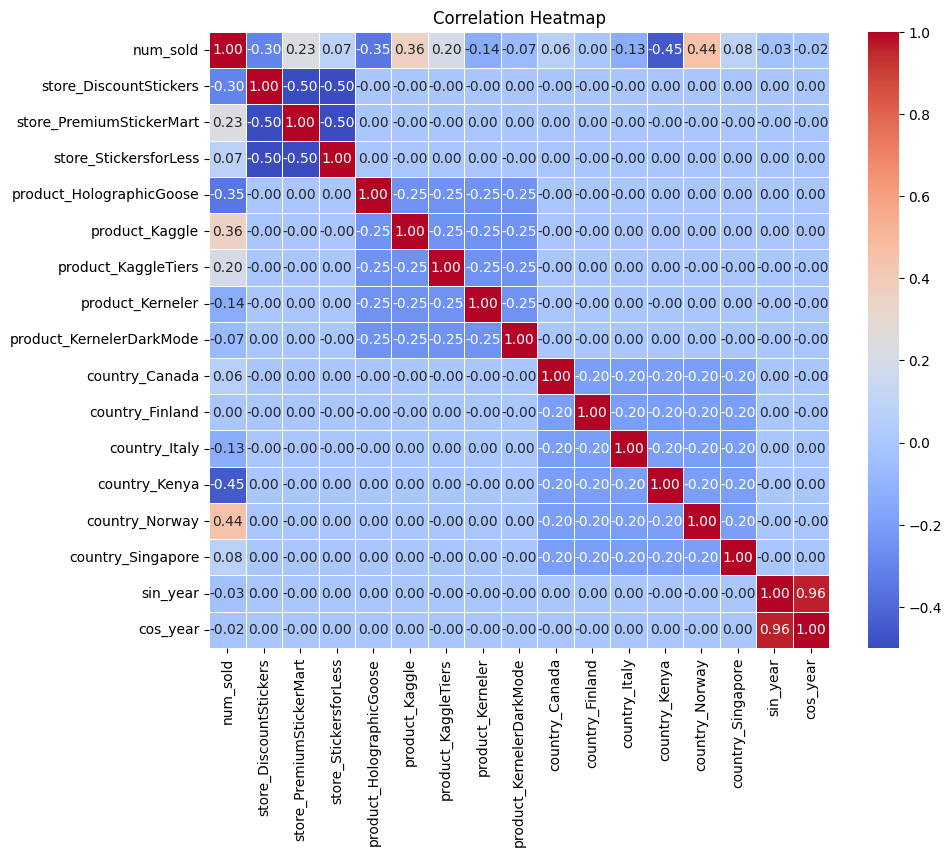

In [695]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `data` is your pandas DataFrame
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as necessary
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()


In [696]:
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:', rmse)

RMSE: 136.16397620369975


In [719]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

xgb_search = RandomizedSearchCV(xgb.XGBRegressor(), param_distributions=param_grid, n_iter=10, scoring="neg_mean_absolute_error", cv=3)
xgb_search.fit(X_train, Y_train)

print(xgb_search.best_params_)
best_xgb = xgb_search.best_estimator_




{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


In [721]:
y_pred_tuned = best_xgb.predict(X_test)
print(y_pred_tuned)


[ 662.3022  1163.3185   287.21286 ...  700.2394  2127.5945   574.7501 ]


In [724]:
from sklearn.metrics import mean_absolute_error

mae_tuned = mean_absolute_error(Y_test, y_pred_tuned)
print("MAE after tuning:", mae_tuned)


MAE after tuning: 81.93381544266573


In [725]:
rmse = np.sqrt(mean_squared_error(Y_test, y_pred_tuned))
print('RMSE:', rmse)

RMSE: 131.90295158120253


In [754]:
len(y_pred_tuned)

46026

In [727]:
y_true = np.array([Y_test])  # Replace with your actual values
y_pred = np.array([y_pred_tuned])  # Replace with your predicted values

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'MAPE: {mape}%')

MAPE: 12.425496223818488%


Kaggle test prediciton

In [730]:
kaggle_data = pd.read_csv(r'Datasets/test.csv')


In [731]:
kaggle_data

,id,date,country,store,product
0,230130,2017-01-01,Canada,Discount Stickers,Holographic Goose
1,230131,2017-01-01,Canada,Discount Stickers,Kaggle
2,230132,2017-01-01,Canada,Discount Stickers,Kaggle Tiers
3,230133,2017-01-01,Canada,Discount Stickers,Kerneler
4,230134,2017-01-01,Canada,Discount Stickers,Kerneler Dark Mode
...,...,...,...,...,...
98545,328675,2019-12-31,Singapore,Premium Sticker Mart,Holographic Goose
98546,328676,2019-12-31,Singapore,Premium Sticker Mart,Kaggle
98547,328677,2019-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers
98548,328678,2019-12-31,Singapore,Premium Sticker Mart,Kerneler


In [732]:
kaggle_data.drop(columns=['id'],inplace=True)

In [700]:
"""# Vectorizing the country data

kaggle_data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)"""

C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\1081909883.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kaggle_data.replace({'country':{'Canada':0,'Finland':1,'Italy':2,'Kenya':3,'Norway':4,'Singapore':5}}, inplace=True)


In [733]:
#Now handling the dates separating it with year, month and day
kaggle_data['date'] = pd.to_datetime(kaggle_data['date'])

In [734]:
kaggle_data['year'] = kaggle_data['date'].dt.year
"""kaggle_data['month'] = kaggle_data['date'].dt.month
kaggle_data['day'] = kaggle_data['date'].dt.day"""

"kaggle_data['month'] = kaggle_data['date'].dt.month\nkaggle_data['day'] = kaggle_data['date'].dt.day"

In [735]:
kaggle_data.drop(columns=['date'],inplace=True)

In [736]:
# handling the store data by removing the spaces between the store names
kaggle_data['store'] = kaggle_data['store'].apply(lambda x: x.replace(' ', ''))

In [737]:
# Vectorizing the product data
# handling the store data by removing the spaces between the store names
kaggle_data['product'] = kaggle_data['product'].apply(lambda x: x.replace(' ', ''))

In [738]:
"""#One Hot Encoding
columns_to_encode = ['country', 'product']

test_encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap

test_encoded_columns = test_encoder.fit_transform(kaggle_data[columns_to_encode])

test_encoded_df = pd.DataFrame(test_encoded_columns, columns=test_encoder.get_feature_names_out(columns_to_encode))

kaggle_data = pd.concat([kaggle_data.drop(columns_to_encode, axis=1).reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)"""

"#One Hot Encoding\ncolumns_to_encode = ['country', 'product']\n\ntest_encoder = OneHotEncoder(sparse_output=False)  # drop='first' avoids the dummy variable trap\n\ntest_encoded_columns = test_encoder.fit_transform(kaggle_data[columns_to_encode])\n\ntest_encoded_df = pd.DataFrame(test_encoded_columns, columns=test_encoder.get_feature_names_out(columns_to_encode))\n\nkaggle_data = pd.concat([kaggle_data.drop(columns_to_encode, axis=1).reset_index(drop=True), test_encoded_df.reset_index(drop=True)], axis=1)"

In [739]:
#One Hot Encoding
kaggle_data = pd.get_dummies(kaggle_data, columns=['store','product','country']).astype(int)

In [740]:
kaggle_data

,year,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore
0,2017,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,2017,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,2017,1,0,0,0,0,1,0,0,1,0,0,0,0,0
3,2017,1,0,0,0,0,0,1,0,1,0,0,0,0,0
4,2017,1,0,0,0,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,2019,0,1,0,1,0,0,0,0,0,0,0,0,0,1
98546,2019,0,1,0,0,1,0,0,0,0,0,0,0,0,1
98547,2019,0,1,0,0,0,1,0,0,0,0,0,0,0,1
98548,2019,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [741]:
kaggle_data["sin_year"] = np.sin(2 * np.pi * kaggle_data["year"] / kaggle_data["year"].max())
kaggle_data["cos_year"] = np.cos(2 * np.pi * kaggle_data["year"] / kaggle_data["year"].max())

In [742]:
kaggle_data.drop(columns='year',inplace=True)

In [743]:
kaggle_data

,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,sin_year,cos_year
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,-6.224017e-03,0.999981
4,1,0,0,0,0,0,0,1,1,0,0,0,0,0,-6.224017e-03,0.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98546,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98547,0,1,0,0,0,1,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98548,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2.449294e-16,1.000000


In [708]:
"kaggle_data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)"

C:\Users\Musta\AppData\Local\Temp\ipykernel_19460\517741393.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kaggle_data.replace({'store':{'DiscountStickers':0,'StickersforLess':1,'PremiumStickerMart':2}},inplace=True)


In [709]:
"kaggle_data['year'].value_counts()"

year
2017    32850
2018    32850
2019    32850
Name: count, dtype: int64

In [710]:
"kaggle_data.replace({'year':{2017:0,2018:1,2019:2}},inplace=True)"

In [744]:
kaggle_data

,store_DiscountStickers,store_PremiumStickerMart,store_StickersforLess,product_HolographicGoose,product_Kaggle,product_KaggleTiers,product_Kerneler,product_KernelerDarkMode,country_Canada,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,sin_year,cos_year
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,-6.224017e-03,0.999981
3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,-6.224017e-03,0.999981
4,1,0,0,0,0,0,0,1,1,0,0,0,0,0,-6.224017e-03,0.999981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98545,0,1,0,1,0,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98546,0,1,0,0,1,0,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98547,0,1,0,0,0,1,0,0,0,0,0,0,0,1,-2.449294e-16,1.000000
98548,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-2.449294e-16,1.000000


In [746]:
test_predictions = model.predict(kaggle_data)

In [747]:
print(test_predictions)

[ 915.63794  731.91394  624.19495 ... 1597.1702   883.7502  1037.0374 ]


In [751]:
# Hyperparameter tuning
Kaggle_y_pred_tuned = best_xgb.predict(kaggle_data)
print(Kaggle_y_pred_tuned)

[1055.0173   716.60626  609.14984 ... 1685.0332   931.1194  1095.1018 ]


In [753]:
len(Kaggle_y_pred_tuned)

98550

In [64]:
sample = pd.read_csv(r'Datasets/test.csv')

In [765]:
Final_prediction = pd.DataFrame({
    'id': sample['id'][:len(test_predictions)],  # Align lengths
    'num_sold': test_predictions
})


In [766]:
Final_prediction

,id,num_sold
0,230130,915.637939
1,230131,731.913940
2,230132,624.194946
3,230133,357.135376
4,230134,412.454803
...,...,...
98545,328675,290.001099
98546,328676,1960.395996
98547,328677,1597.170166
98548,328678,883.750183


In [767]:
Final_prediction.to_csv("Datasets/Final_prediction.csv", index=False)

Sample Testing form arima model

In [ ]:
from statsmodels.tsa.arima.model import SARIMAX

# Fit the ARIMA model on Y_train
model = ARIMA(Y_train ,order=(1, 1, 2))  # Adjust the (p, d, q) parameters as needed
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:               184104
Model:                 ARIMA(1, 1, 2)   Log Likelihood            -1462520.582
Date:                Wed, 29 Jan 2025   AIC                        2925049.165
Time:                        12:12:28   BIC                        2925089.658
Sample:                             0   HQIC                       2925061.126
                             - 184104                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9982      0.003   -304.962      0.000      -1.005      -0.992
ma.L1         -0.0020      0.003     -0.589      0.556      -0.009       0.005
ma.L2         -0.9980      0.003   -291.673      0.0

In [ ]:
# Predict future values
forecast = model_fit.forecast(steps=len(X_test))  # Predict for the length of X_test
print("Forecasted values:", forecast)


c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Musta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecasted values: 184104    739.629795
184105    750.225142
184106    739.649388
184107    750.205585
184108    739.668909
             ...    
230125    744.932371
230126    744.932371
230127    744.932371
230128    744.932371
230129    744.932371
Name: predicted_mean, Length: 46026, dtype: float64


Mean Squared Error: 466285.5472657132
Root Mean Squared Error: 682.8510432486087


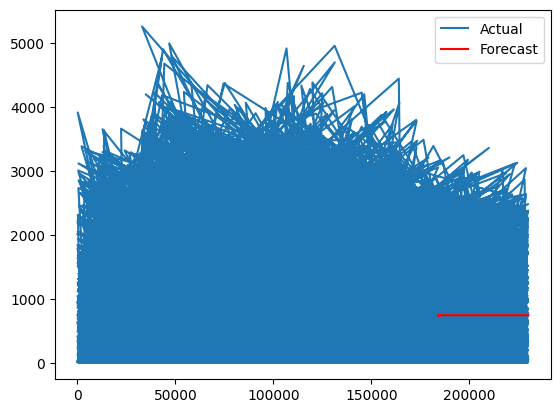

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(Y_test, forecast)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Visualize the predictions
import matplotlib.pyplot as plt
plt.plot(Y_test, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()
